In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.impute import SimpleImputer

# Univariate selection

In [27]:
data = pd.read_excel('data/1year.xlsx')
data['B'] = (data['B'].index > 6755).astype(int)
def set_new_headers(df):
    cols = ['X' + str(i+1) for i in range(len(df.columns)-1)]
    cols.append('Y')
    df.columns = cols

imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
mean_imputed_df = pd.DataFrame(imputer.fit_transform(data))
set_new_headers(mean_imputed_df)

data_imp = pd.DataFrame()

X = mean_imputed_df.iloc[:, :-1]
Y = mean_imputed_df.iloc[:,-1]

In [28]:
best_f = SelectKBest(score_func=chi2, k=15)
fit = best_f.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Scores']
print(featureScores.nlargest(10, 'Score'))

ValueError: Input X must be non-negative.

[0.01235638 0.01160304 0.01429007 0.01728837 0.00778765 0.0122577
 0.01465473 0.01033697 0.01490178 0.01411867 0.03286346 0.01281898
 0.01160153 0.01680045 0.01542443 0.01420604 0.01244501 0.01191842
 0.00804322 0.01188388 0.0152394  0.01751431 0.01316538 0.01616992
 0.01527391 0.01458606 0.14149446 0.0094934  0.02278758 0.0105572
 0.01355237 0.01014091 0.01265858 0.01744143 0.0126192  0.01319857
 0.01405155 0.01584989 0.01403811 0.0141531  0.01018204 0.01248893
 0.0095073  0.01134152 0.01233909 0.02193346 0.01349898 0.01247351
 0.0111671  0.01355994 0.01497797 0.00956723 0.0123905  0.01192292
 0.0131461  0.01328106 0.01309315 0.01652106 0.01136083 0.0138011
 0.01408105 0.00981736 0.01396458 0.01199713]


C:\Developement\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


pandas.core.series.Series

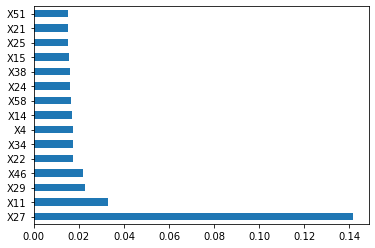

In [33]:
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

f_importance = pd.Series(model.feature_importances_, index=X.columns)
f_importance.nlargest(15).plot(kind='barh')
type(f_importance)

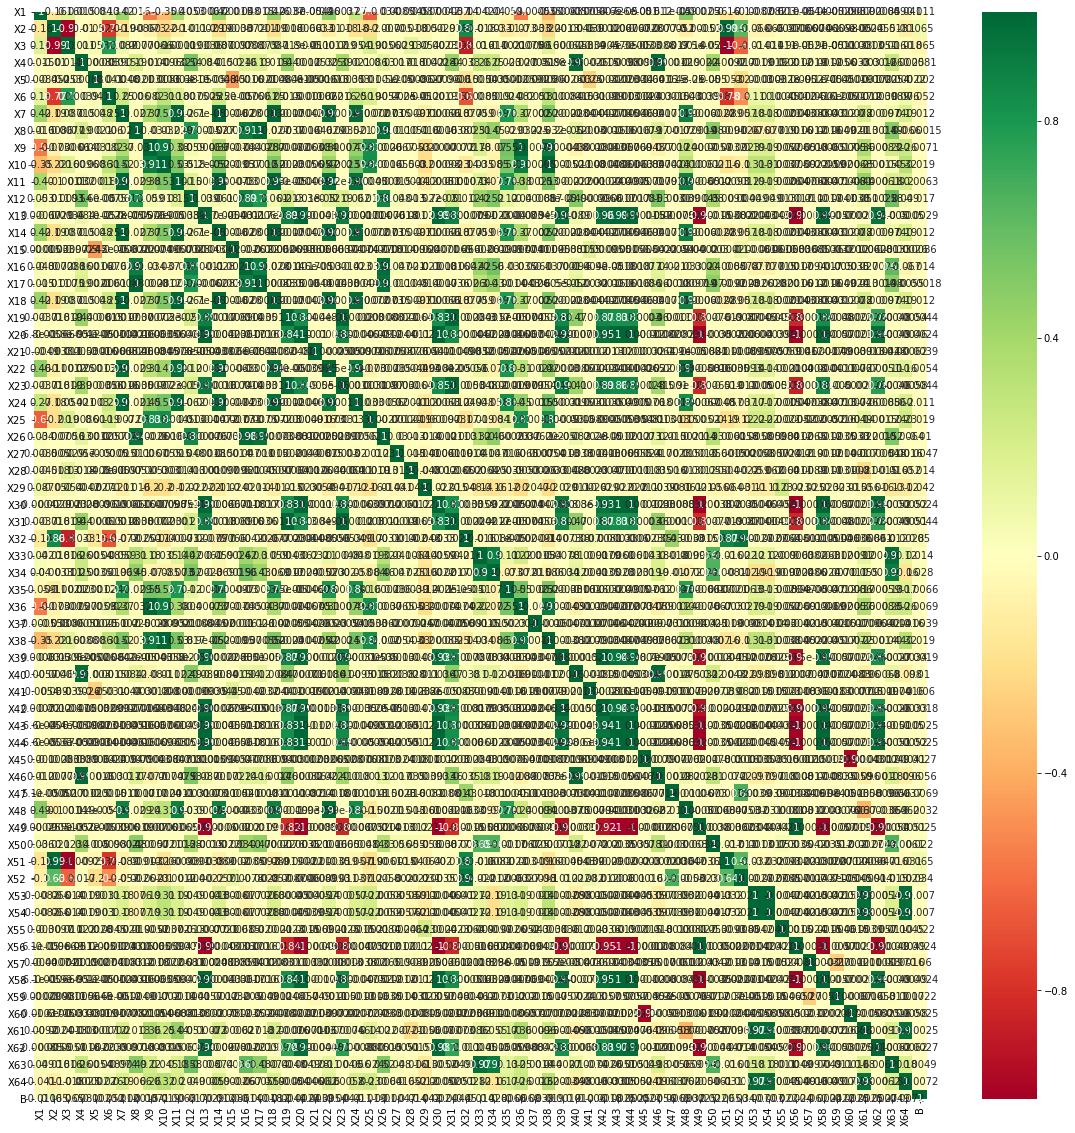

In [30]:
corm = data.corr()
top_corr_fs = corm.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_fs].corr(), annot=True, cmap="RdYlGn")